# Bank marketing (Campaign) project


# Team member: Archana Devi Ramesh
# Batch code: LISUM16
# Submitted to: Data Glacier


# Problem Description: A machine learning classification model in predicting if a customer will subscribe to a bank's term deposit or not

# Dataset link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
#importing required libraries

import pandas as pd

In [2]:
#reading the dataset

df = pd.read_csv('bank-additional-full.csv', delimiter = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
df.iloc[0]

age                        56
job                 housemaid
marital               married
education            basic.4y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  261
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed            5191.0
y                          no
Name: 0, dtype: object

In [3]:
df.shape

(41188, 21)

In [3]:
df.duplicated().sum()

12

In [3]:
df.drop_duplicates(keep = 'first', inplace = True)
print(df.duplicated().sum())
print(df.shape)

0
(41176, 21)


In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df.drop('duration', axis = 1, inplace = True)

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

In [22]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No missing data in the dataset

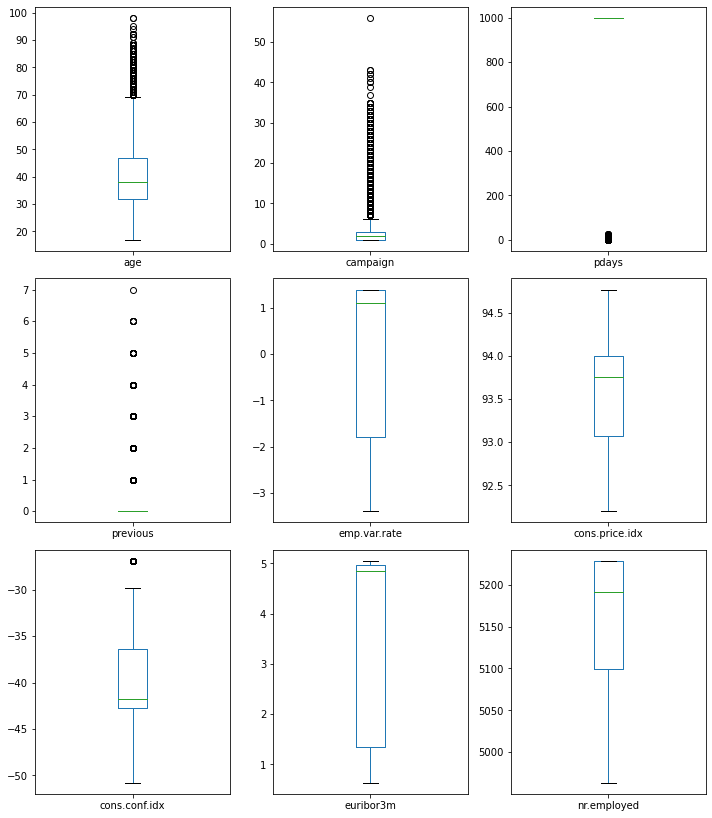

In [7]:
#outlier detection

import matplotlib.pyplot as plt

cols = ['age', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

       
plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [8]:
#checking statistics of outlier features

df[['age', 'pdays', 'campaign', 'previous']].describe()

,age,pdays,campaign,previous
count,41176.00000,41176.000000,41176.000000,41176.000000
mean,40.02380,962.464810,2.567879,0.173013
std,10.42068,186.937102,2.770318,0.494964
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,999.000000,1.000000,0.000000
50%,38.00000,999.000000,2.000000,0.000000
75%,47.00000,999.000000,3.000000,0.000000
max,98.00000,999.000000,56.000000,7.000000


In [18]:
len(df[df['pdays'] == 999]) / len(df) * 100

96.32174419733903

In [9]:
len(df[df['campaign'] > 20])  / len(df) * 100

0.38129007188653585

In [32]:
len(df[df['campaign'] > 7])

1777

# Imputation using median

From df.describe(), the median is the 50% value, which is 2 

In [21]:
#The value which is outside the whisker
print(df['campaign'].quantile(0.95))

7.0


In [7]:
#replacing the values which are greater than the 95th percentile
import numpy as np
df['campaign1'] = np.where(df['campaign'] > 7, 2, df['campaign'])
df[['campaign', 'campaign1']].describe()

,campaign,campaign1
count,41176.000000,41176.000000
mean,2.567879,2.118127
std,2.770318,1.383215
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,56.000000,7.000000


After median imputation, the maximum value has now become 7

# Imputation using mean

From df.describe(), the mean is 2.56

In [8]:
#replacing the values which are greater than the 95th percentile
df['campaign2'] = np.where(df['campaign'] > 7, 2.56, df['campaign'])
df[['campaign', 'campaign1','campaign2']].describe()

,campaign,campaign1,campaign2
count,41176.000000,41176.000000,41176.000000
mean,2.567879,2.118127,2.142295
std,2.770318,1.383215,1.385829
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000
max,56.000000,7.000000,7.000000


Statictics of the dataset after both median and mean imputation remains more or less the same 

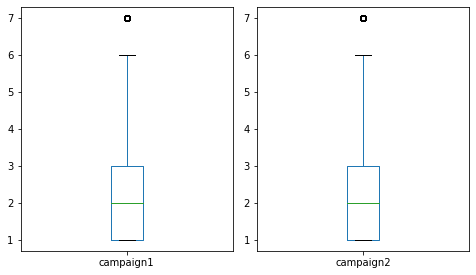

In [9]:
#outlier detection  after imputation
import matplotlib.pyplot as plt
cols = ['campaign1','campaign2']
plt.figure(figsize=(10,15))
for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

# EDA

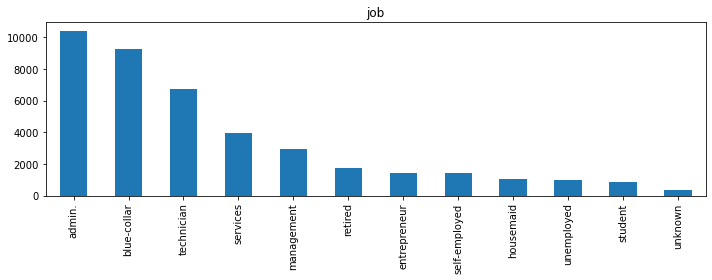

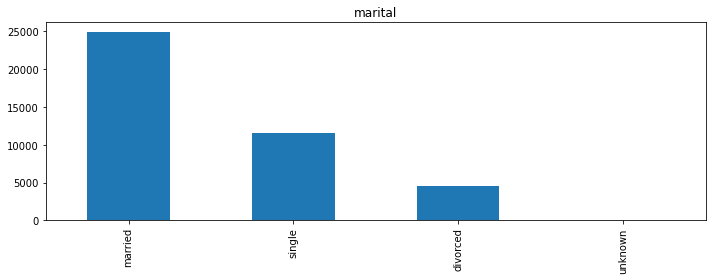

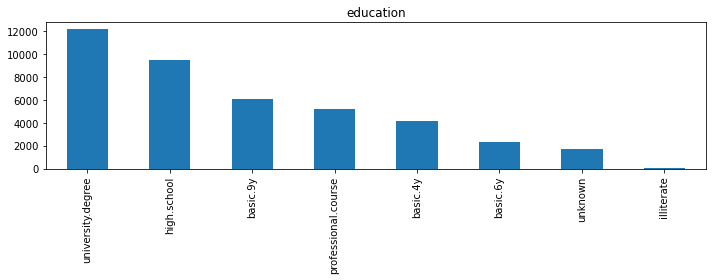

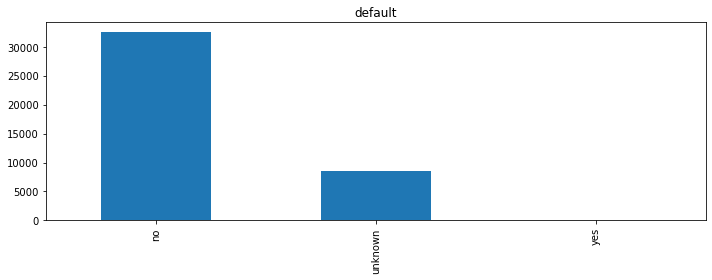

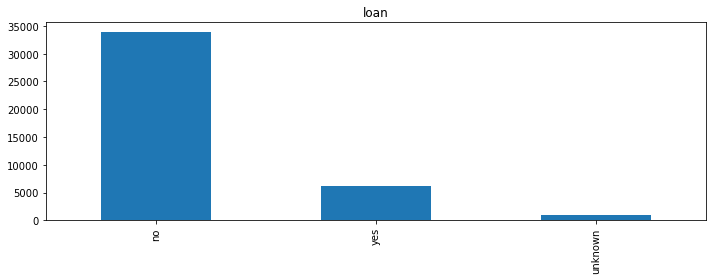

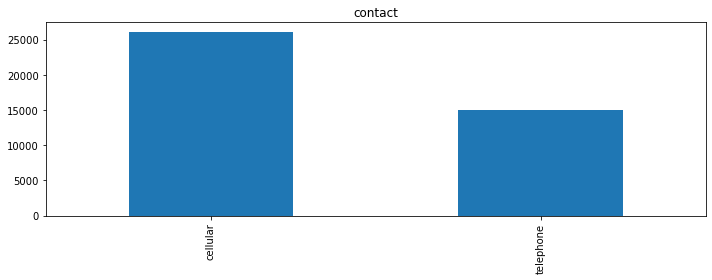

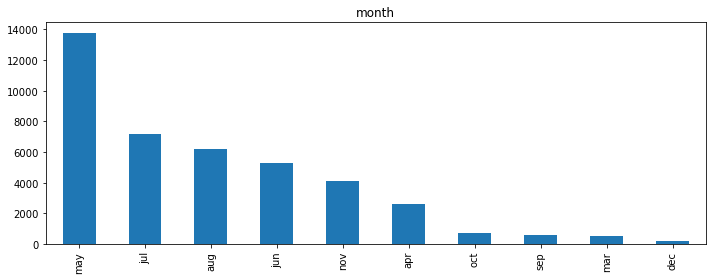

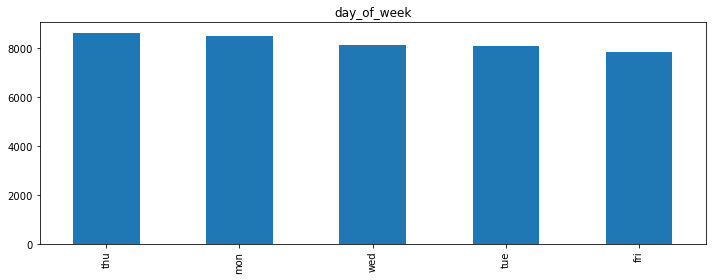

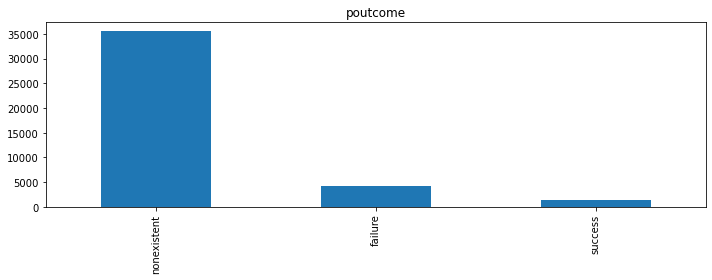

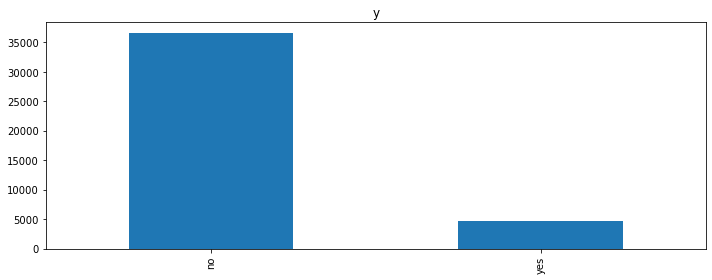

In [15]:
#exploring categorical values

categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.tight_layout()

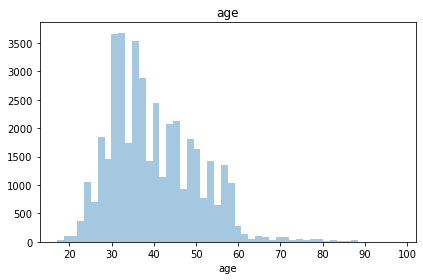

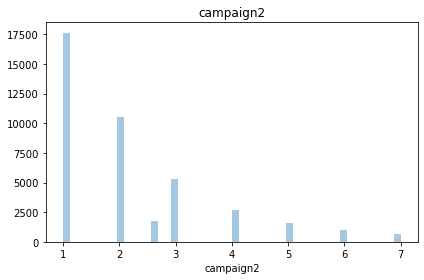

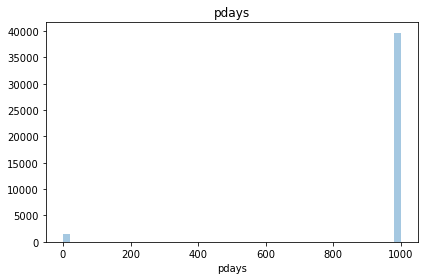

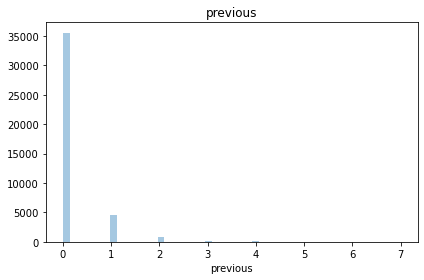

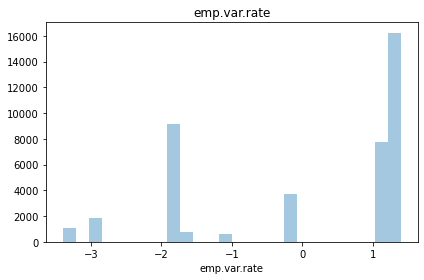

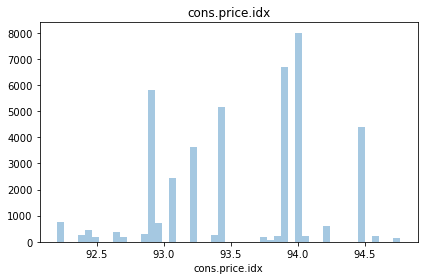

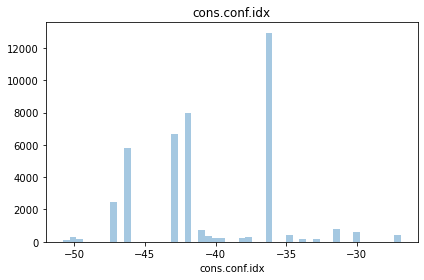

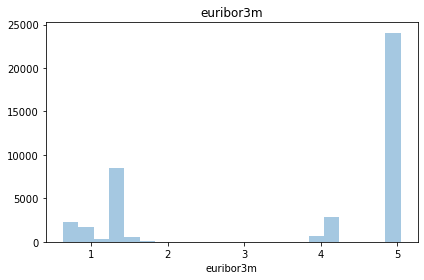

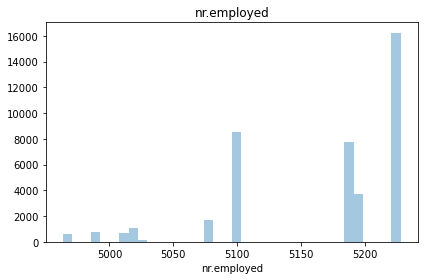

In [19]:
numerical_variables = ['age','campaign2', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']

for col in numerical_variables:
    sns.distplot(df[col], kde = False)
    plt.title(col)
    plt.tight_layout()
    plt.show()

C:\Users\archa\AppData\Local\Temp/ipykernel_1692/2954315967.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


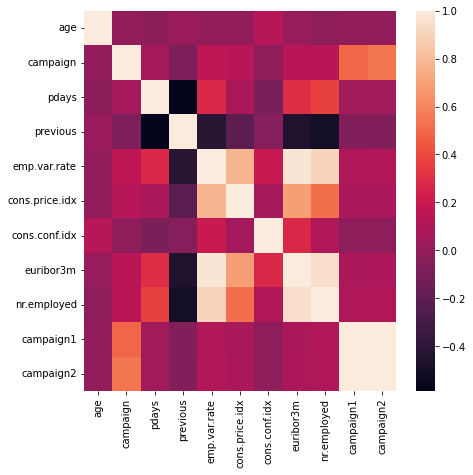

In [21]:
# correlation matrix

corr = df.corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr)
plt.show()

  age_group  count
0     17-25   1665
1     26-40  22096
2     41-60  16506
3       60+    909


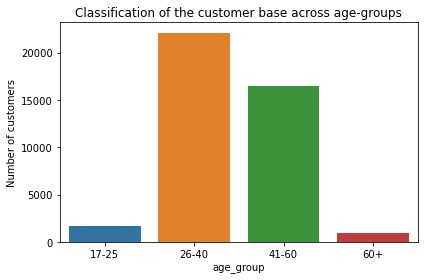

In [22]:
# Adding new age-group column to bank-additional-full data
# min = 17, max = 98 yrs
# 17-25, 26-40, 41-60, 60+ yrs
groups = df['age'].apply(lambda x: '17-25' if x<=25 else ('26-40' if x<=40 else ('41-60' if x<=60 else '60+')))
df['age_group'] = groups

age_group_counts = pd.DataFrame(df.groupby('age_group').age.count()).rename({'age':'count'}, axis = 1).reset_index()
print(age_group_counts)

sns.barplot(x = 'age_group', y = 'count', data = age_group_counts)
plt.title('Classification of the customer base across age-groups')
plt.ylabel('Number of customers')
plt.tight_layout()
plt.show()

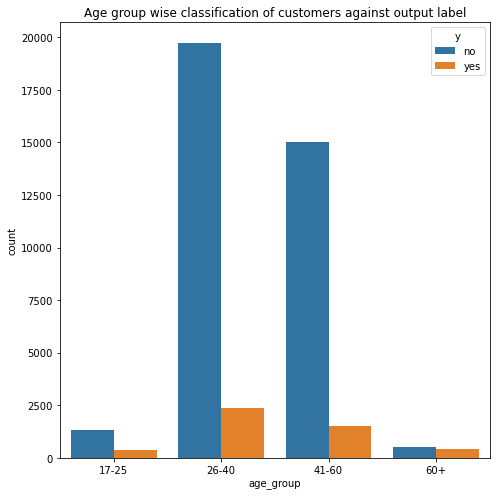

In [23]:
# Looking at relation between different age groups and the output label y

agegroup_y = pd.DataFrame(df.groupby('age_group').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (7,7))
plt.title('Age group wise classification of customers against output label')
sns.barplot(x = 'age_group', y = 'count', hue = 'y', data = agegroup_y)
plt.tight_layout()
plt.show()

In the age-groups of 26-40 and 41-60 yrs, majority of the people are not subscribed to the term deposit plan

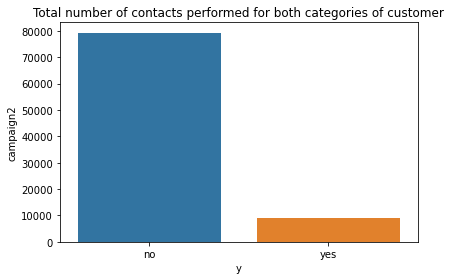

In [26]:
# Looking at relation between Number of contacts made to the customer (campaign) and the output label y

camp = pd.DataFrame(df.groupby('y')['campaign2'].sum()).reset_index()
plt.title('Total number of contacts performed for both categories of customer')
sns.barplot(x = 'y', y = 'campaign2', data = camp)
plt.tight_layout()
plt.show()

When more number of contacts is made to the customer, they haven't subscribed to the term deposit plan 

age_group
17-25     3568.52
26-40    47185.00
41-60    35779.76
60+       1677.84
Name: campaign2, dtype: float64


C:\Users\archa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


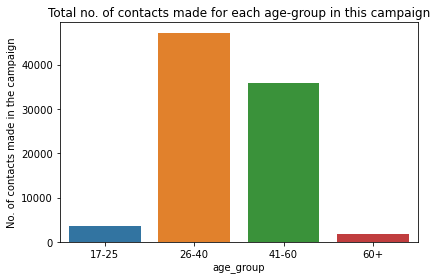

In [29]:
# Looking at relation between 'age_group' and 'campaign' that is number of contacts performed for each age group

ag_camp = df.groupby('age_group').campaign2.sum()
print(ag_camp)

plt.title('Total no. of contacts made for each age-group in this campaign')
sns.barplot(ag_camp.index, ag_camp.values)
plt.ylabel('No. of contacts made in the campaign')
plt.tight_layout()
plt.show()

The 26-40 and 41-60 age-groups witness majority of the contacts made in this campaign. These two age-groups seem to the target groups for the bank.

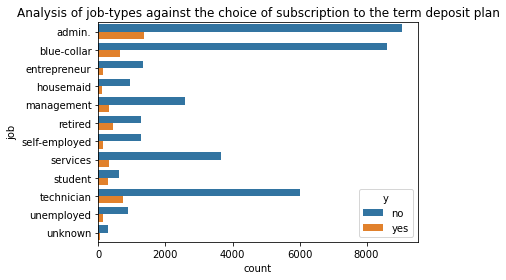

In [35]:
# Looking at relation between job and the output label y

joby = pd.DataFrame(df.groupby('job').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()
plt.title('Analysis of job-types against the choice of subscription to the term deposit plan')
sns.barplot(x = 'count', y = 'job', hue = 'y', data = joby)
plt.tight_layout()
plt.show()

Looking at the jobs, 'admin', 'blue-collar' and 'technician' are the prominent jobs and most of the customers in these jobs have rejected the term deposit plan.

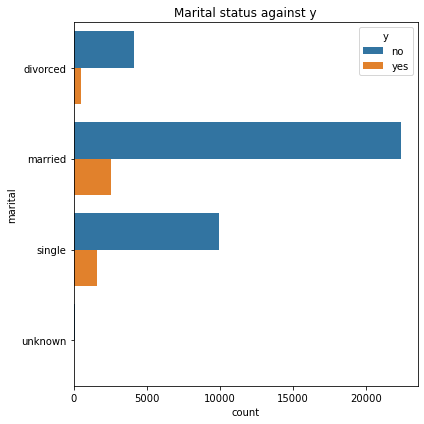

In [39]:
# Analysing marital status and the output label

marital = pd.DataFrame(df.groupby('marital').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

# marital status vs y
plt.figure(figsize = (6,6))
plt.title('Marital status against y')
sns.barplot(x = 'count', y = 'marital', hue = 'y', data = marital)
plt.tight_layout()
plt.show()

married and single customers are the majority of the customer base and comparatively married customers have taken the term deposit

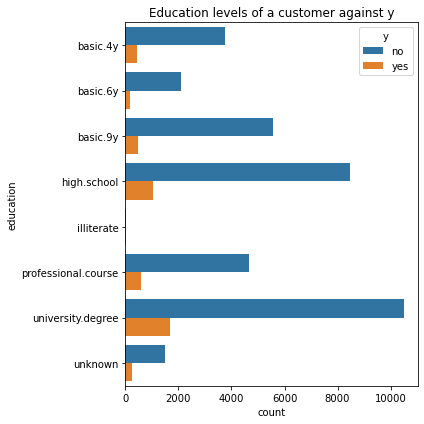

In [41]:
# Analysing the different education levels of a customer against the choice of subscription

edu = pd.DataFrame(df.groupby('education').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (6,6))
plt.title('Education levels of a customer against y')
sns.barplot(x = 'count', y = 'education', hue = 'y', data = edu)
plt.tight_layout()
plt.show()

Customers with university degree have subscribed to the term deposit more

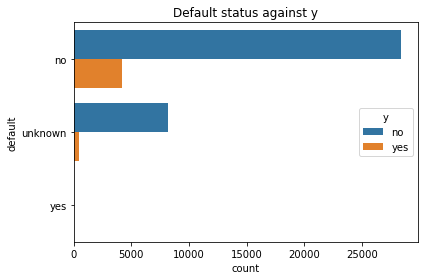

In [42]:
# Analysing the default status against the choice of subscription
default = pd.DataFrame(df.groupby('default').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Default status against y')
sns.barplot(x = 'count', y = 'default', hue = 'y', data = default)
plt.tight_layout()
plt.show()

# There is no data for customers who have a default.

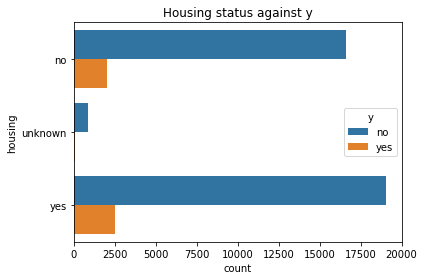

In [43]:
# Analysing housing status and y
housing = pd.DataFrame(df.groupby('housing').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Housing status against y')
sns.barplot(x = 'count', y = 'housing', hue = 'y', data = housing)
plt.tight_layout()
plt.show()

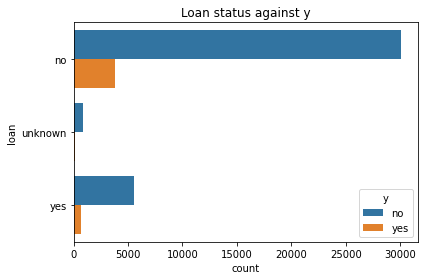

In [44]:
# analysing loan status and y
loan = pd.DataFrame(df.groupby('loan').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Loan status against y')
sns.barplot(x = 'count', y = 'loan', hue = 'y', data = loan)
plt.tight_layout()
plt.show()

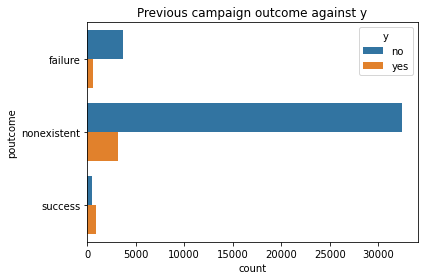

In [45]:
# analysing poutcome and y

poutcome = pd.DataFrame(df.groupby('poutcome').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.title('Previous campaign outcome against y')
sns.barplot(x = 'count', y = 'poutcome', hue = 'y', data = poutcome)
plt.tight_layout()
plt.show()    